# Project 7 

In this project, you will implement the the clustering techniques that you've learned this week. 

#### Step 1: Load the python libraries that you will need for this project 

In [1]:
%matplotlib inline

import pandas as pd 
import matplotlib as plt
import numpy as np
import sklearn
import sys
import psycopg2 as psy

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('fivethirtyeight')

# Objectives

1. Cut down on delays in airports nationwide

    - Via understanding characteristics and groupings of airports based on departure and operational delays

### Things to keep in mind

- What operational factors are most directly correlated with delays?

- Factors which determine airport groupings: size? region?

#### Step 2: Examine your data 

In [2]:
ap_can = pd.read_csv('../assets/airport_cancellations.csv')
ap_can.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004.0,242.0,235.0,71.0,46.0
1,ABQ,2005.0,221.0,190.0,61.0,33.0
2,ABQ,2006.0,392.0,329.0,71.0,124.0
3,ABQ,2007.0,366.0,304.0,107.0,45.0
4,ABQ,2008.0,333.0,300.0,79.0,42.0


In [3]:
ap_can.shape

(805, 6)

In [4]:
ap_can.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
count,805.000000,805.000000,805.000000,805.000000,805.000000
mean,2008.986335,1292.038509,1333.124224,173.315528,169.413665
std,3.158116,1835.961943,1975.224868,172.345539,228.521615
min,2004.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,349.000000,314.000000,62.000000,41.000000
50%,2009.000000,663.000000,642.000000,110.000000,84.000000
75%,2012.000000,1472.000000,1523.000000,236.000000,190.000000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000


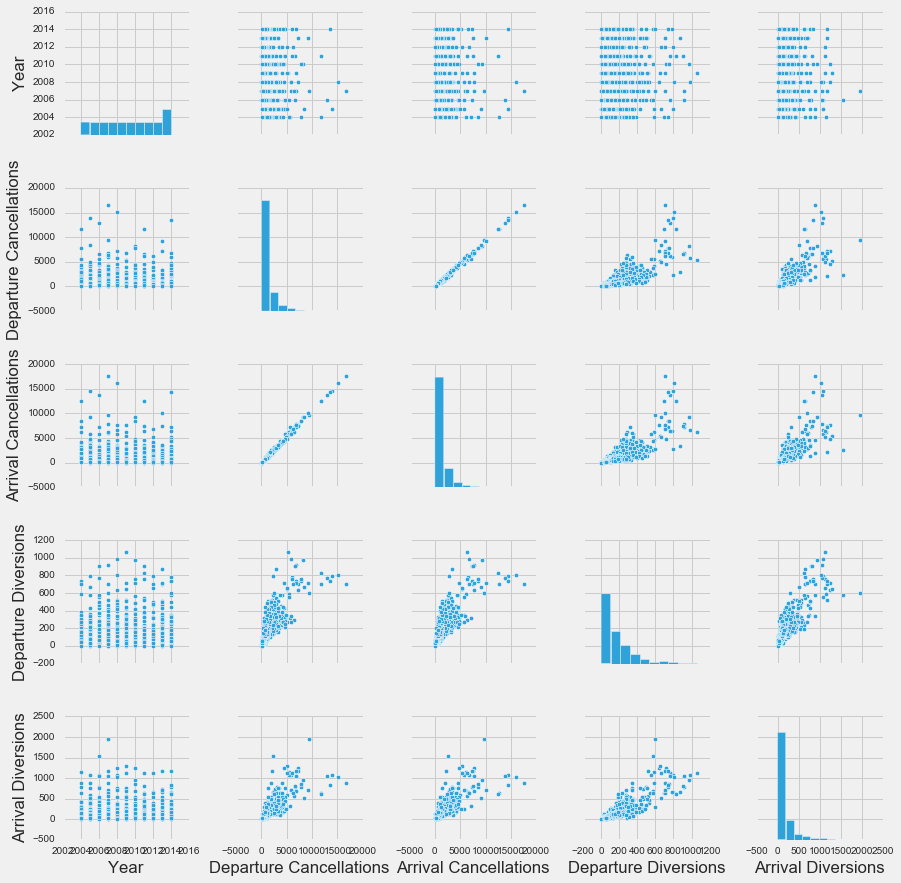

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
ax = sns.pairplot(ap_can)

In [6]:
ap_ops = pd.read_csv('../assets/Airport_operations.csv')
ap_ops.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [7]:
ap_ops.shape

(841, 15)

In [8]:
ap_ops.describe()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,2009.028537,108257.063020,107815.561237,0.764119,0.714283,0.754281,13.561403,13.703389,3.519750,16.249964,2.921237,1.348894,3.330773,14.013222
std,3.156497,98278.401526,97916.908601,0.093361,0.101271,0.082302,4.746563,3.792181,2.391278,5.353012,1.201453,0.882252,1.026872,4.482215
min,2004.000000,261.000000,259.000000,0.246700,0.245700,0.324100,5.350000,7.040000,0.000000,6.290000,0.950000,0.000000,1.230000,6.330000
25%,2006.000000,37653.000000,37502.000000,0.745700,0.684800,0.737500,10.910000,11.260000,2.210000,12.950000,2.050000,0.800000,2.630000,11.300000
50%,2009.000000,72043.000000,71254.000000,0.782500,0.737200,0.768300,12.640000,12.810000,2.990000,15.220000,2.650000,1.080000,3.160000,13.080000
75%,2012.000000,162913.000000,160775.000000,0.809800,0.772200,0.796500,14.950000,15.650000,4.080000,17.940000,3.620000,1.740000,3.860000,15.250000
max,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,40.800000,35.760000,18.940000,40.870000,7.820000,6.180000,7.520000,34.880000


In [9]:
ap = pd.read_csv('../assets/airports.csv')
ap.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443.0,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.701556,-64.801722,Yes
1,5088.0,X64,PATILLAS,NaN,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.982189,-66.019330,No
2,2886.0,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.008306,-66.563028,Yes
3,2879.0,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.134811,-65.493617,Yes
4,2883.0,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138017,-65.800718,Yes


In [10]:
ap.shape

(5167, 13)

### Intro: Write a problem statement / aim for this project

Aim: To uncover airports clusters, to facilitate further investigations into reasons causing delays.

#### Created a sqlite3 database

In [13]:
import sqlite3

ap_db = 'ap_db.sqlite3'
conn = sqlite3.connect(ap_db)
c = conn.cursor()

Load our csv files into tables

In [14]:
from pandas.io import sql

In [15]:
ap_can.to_sql('airport_cancel', \
              con = conn, \
              if_exists = 'replace',
              index = False
             )


//anaconda/lib/python2.7/site-packages/pandas/core/generic.py:1165: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  chunksize=chunksize, dtype=dtype)


In [16]:
ap_ops.to_sql('airport_operations', con = conn, if_exists='replace', index=False)

In [17]:
ap.dtypes

Key                        float64
LocID                       object
AP_NAME                     object
ALIAS                       object
Facility Type               object
FAA REGION                  object
COUNTY                      object
CITY                        object
STATE                       object
AP Type                     object
Latitude                   float64
Longitude                  float64
Boundary Data Available     object
dtype: object

In [18]:
ap.fillna('', inplace=True)

In [19]:
ap.head()

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,3443,STX,HENRY E ROHLSEN,Henry E Rohlsen Int'l Airport,Airport,ASO,-VIRGIN ISLANDS-,CHRISTIANSTED,VI,Public Use,17.7016,-64.8017,Yes
1,5088,X64,PATILLAS,,Airport,ASO,#NAME?,PATILLAS,PR,Public Use,17.9822,-66.0193,No
2,2886,PSE,MERCEDITA,Aeropuerto Mercedita,Airport,ASO,#NAME?,PONCE,PR,Public Use,18.0083,-66.563,Yes
3,2879,VQS,ANTONIO RIVERA RODRIGUEZ,Aeropuerto Antonio Rivera Rodr�guez,Airport,ASO,#NAME?,ISLA DE VIEQUES,PR,Public Use,18.1348,-65.4936,Yes
4,2883,X63,HUMACAO,Aeropuerto Regional De Humacao,Airport,ASO,#NAME?,HUMACAO,PR,Public Use,18.138,-65.8007,Yes


In [20]:
ap[ap['LocID'] == 'ABQ']

,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
1223,2348,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609,Yes


In [21]:
ap['Facility Type'].value_counts()

Airport    5164
              3
Name: Facility Type, dtype: int64

In [22]:
want_list = [x for x in ap.columns if x not in ['Key', 'Latitude', 'Longitude']]

ap[want_list] = ap[want_list].applymap(lambda x: unicode(x, 'utf-8'))

In [23]:
ap.to_sql('airports', con = conn, if_exists='replace', index = False)

Join airport_cancellations.csv and airports.csv into one table

In [24]:
c.execute(
    'CREATE TABLE AIRPORTS_CANCEL \
    AS SELECT * FROM \
    (airport_cancel \
    INNER JOIN airports \
    ON airports.LocID = airport_cancel.Airport);')

# Save (commit) the changes
conn.commit()

Query the database for our intial data

In [25]:
sql.read_sql('SELECT * FROM \
    AIRPORTS_CANCEL \
    LIMIT 5;', con=conn)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,Key,LocID,AP_NAME,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004.0,242.0,235.0,71.0,46.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
1,ABQ,2005.0,221.0,190.0,61.0,33.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
2,ABQ,2006.0,392.0,329.0,71.0,124.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
3,ABQ,2007.0,366.0,304.0,107.0,45.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes
4,ABQ,2008.0,333.0,300.0,79.0,42.0,2348.0,ABQ,ALBUQUERQUE INTL SUNPORT,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.040194,-106.609194,Yes


#### 1.2 What are the risks and assumptions of our data? 

1. Delays are given in averages, no information was provided on the variances and the metric for average is not known.

2. It was assumed that the data obtained was accurate in the collection process and veracity of data.

### Part 2: Exploratory Data Analysis

#### 2.1 Plot and Describe the Data

In [26]:
ap_cancel = pd.merge(ap_can, ap_ops, how = 'inner', left_on=['Airport', 'Year'], right_on=['airport', 'year'])
ap_cancel = pd.merge(ap_cancel, ap, how = 'inner', left_on = 'Airport', right_on = 'LocID')
ap_cancel.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,airport,year,departures for metric computation,arrivals for metric computation,...,ALIAS,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude,Boundary Data Available
0,ABQ,2004.0,242.0,235.0,71.0,46.0,ABQ,2004,53971,53818,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609,Yes
1,ABQ,2005.0,221.0,190.0,61.0,33.0,ABQ,2005,51829,51877,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609,Yes
2,ABQ,2006.0,392.0,329.0,71.0,124.0,ABQ,2006,49682,51199,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609,Yes
3,ABQ,2007.0,366.0,304.0,107.0,45.0,ABQ,2007,53255,53611,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609,Yes
4,ABQ,2008.0,333.0,300.0,79.0,42.0,ABQ,2008,49589,49512,...,Albuquerque Int'l Sunport,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609,Yes


In [27]:
ap_cancel.dtypes

Airport                                object
Year                                  float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
airport                                object
year                                    int64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Key                               

In [28]:
ap_cancel.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2009.016270,1299.314143,1341.068836,174.250313,170.256571,2009.016270,113471.568210,113003.959950,0.779123,0.726958,0.766864,12.890250,13.872879,3.683292,15.703504,2.875532,1.414155,3.290826,13.428811
std,3.150126,1840.877193,1980.459892,172.638408,229.162686,3.150126,98059.144667,97705.308115,0.052279,0.076027,0.050502,3.036474,3.806217,2.337325,4.364217,1.169739,0.854702,0.989275,3.251647
min,2004.000000,0.000000,0.000000,0.000000,0.000000,2004.000000,731.000000,717.000000,0.529900,0.380800,0.513600,5.350000,7.240000,0.100000,6.290000,0.950000,0.020000,1.330000,6.330000
25%,2006.000000,349.000000,314.500000,62.000000,41.000000,2006.000000,42064.000000,42006.500000,0.753100,0.691800,0.742150,10.830000,11.475000,2.300000,12.890000,2.035000,0.845000,2.615000,11.270000
50%,2009.000000,670.000000,653.000000,111.000000,84.000000,2009.000000,79489.000000,79750.000000,0.784100,0.740200,0.770500,12.540000,12.940000,3.050000,15.130000,2.620000,1.140000,3.130000,12.970000
75%,2012.000000,1483.500000,1542.000000,237.000000,190.000000,2012.000000,166469.500000,165560.500000,0.810700,0.773700,0.797600,14.620000,15.745000,4.220000,17.555000,3.550000,1.775000,3.815000,14.935000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000,2014.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000


In [30]:
df_original = ap_cancel.copy()

In [31]:
# Removing unnecessary columns

del ap_cancel['airport']
del ap_cancel['LocID']
del ap_cancel['ALIAS']
del ap_cancel['Boundary Data Available']
del ap_cancel['AP_NAME']
del ap_cancel['year']
ap_cancel.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,average gate arrival delay,Key,Facility Type,FAA REGION,COUNTY,CITY,STATE,AP Type,Latitude,Longitude
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,...,10.87,2348,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609
1,ABQ,2005.0,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,...,10.24,2348,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609
2,ABQ,2006.0,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,...,11.82,2348,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609
3,ABQ,2007.0,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,...,12.71,2348,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609
4,ABQ,2008.0,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,...,11.48,2348,Airport,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,35.0402,-106.609


In [32]:
ap_cancel.dtypes

Airport                                object
Year                                  float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
Key                                    object
Facility Type                          object
FAA REGION                        

In [33]:
ap_cancel['Facility Type'].unique()

array([u'Airport'], dtype=object)

In [34]:
ap_cancel['FAA REGION'].unique()

array([u'ASW', u'AAL', u'ASO', u'ANE', u'AEA', u'AWP', u'AGL', u'ANM',
       u'ACE'], dtype=object)

In [35]:
ap_cancel['AP Type'].unique()

array([u'Federalized/Commercial', u'Public Use'], dtype=object)

In [36]:
ap_cancel['Key'].unique()

array([2348.0, 246.0, 921.0, 3097.0, 755.0, 263.0, 3061.0, 1531.0, 2431.0,
       496.0, 1556.0, 2527.0, 2094.0, 1418.0, 3149.0, 2554.0, 769.0, 706.0,
       3150.0, 1633.0, 2332.0, 801.0, 975.0, 3341.0, 2502.0, 770.0, 3185.0,
       1266.0, 2465.0, 809.0, 2458.0, 2410.0, 584.0, 2462.0, 582.0, 1892.0,
       836.0, 1163.0, 3057.0, 2308.0, 825.0, 3575.0, 1791.0, 1501.0, 596.0,
       976.0, 2252.0, 615.0, 1164.0, 617.0, 843.0, 2775.0, 2849.0, 456.0,
       2850.0, 618.0, 2893.0, 2144.0, 1165.0, 857.0, 650.0, 3297.0, 1437.0,
       3520.0, 651.0, 609.0, 2885.0, 3377.0, 644.0, 570.0, 1895.0, 2494.0,
       864.0, 474.0], dtype=object)

In [37]:
# Removing further unneccessary columns

del ap_cancel['Key']
del ap_cancel['Facility Type']
del ap_cancel['Latitude']
del ap_cancel['Longitude']
ap_cancel.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,FAA REGION,COUNTY,CITY,STATE,AP Type
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,...,12.10,2.46,0.83,2.55,10.87,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial
1,ABQ,2005.0,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,...,11.20,2.26,0.89,2.34,10.24,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial
2,ABQ,2006.0,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,...,12.33,2.12,0.84,2.66,11.82,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial
3,ABQ,2007.0,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,...,12.95,2.19,1.29,3.06,12.71,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial
4,ABQ,2008.0,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,...,12.32,1.82,1.03,2.79,11.48,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial


In [38]:
ap_cancel.dtypes

Airport                                object
Year                                  float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
FAA REGION                             object
COUNTY                                 object
CITY                              

In [39]:
labels_list = ['COUNTY', 'CITY', 'STATE']

In [40]:
# Making a copy of the df
df = ap_cancel[[x for x in ap_cancel.columns if x not in labels_list]]
df.head()

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,FAA REGION,AP Type
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,...,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87,ASW,Federalized/Commercial
1,ABQ,2005.0,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,...,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24,ASW,Federalized/Commercial
2,ABQ,2006.0,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,...,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82,ASW,Federalized/Commercial
3,ABQ,2007.0,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,...,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71,ASW,Federalized/Commercial
4,ABQ,2008.0,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,...,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48,ASW,Federalized/Commercial


In [41]:
df['Airport'].value_counts()

LAS    11
STL    11
DCA    11
PVD    11
SEA    11
TPA    11
BWI    11
PHL    11
BUF    11
DAY    11
ONT    11
SAT    11
RDU    11
MEM    11
ISP    11
IAH    11
JAX    11
OAK    11
BUR    11
MHT    11
HNL    11
MKE    11
MSY    11
MIA    11
ATL    11
BOS    11
MDW    11
MSP    11
SWF    11
SAN    11
       ..
SNA    11
SDF    11
DFW    11
PHX    11
LAX    11
IND    11
ORD    11
OGG    11
RSW    11
BHM    11
PIT    11
OMA    11
MCO    11
IAD    11
SJU    11
ABQ    11
AUS    11
HOU    11
HPN    11
JFK    11
CLT    11
EWR    11
BNA    11
PBI    11
DAL    11
SLC    11
PSP     8
SMF     8
OXR     7
RFD     6
Name: Airport, dtype: int64

In [42]:
df.describe()

,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,2009.016270,1299.314143,1341.068836,174.250313,170.256571,113471.568210,113003.959950,0.779123,0.726958,0.766864,12.890250,13.872879,3.683292,15.703504,2.875532,1.414155,3.290826,13.428811
std,3.150126,1840.877193,1980.459892,172.638408,229.162686,98059.144667,97705.308115,0.052279,0.076027,0.050502,3.036474,3.806217,2.337325,4.364217,1.169739,0.854702,0.989275,3.251647
min,2004.000000,0.000000,0.000000,0.000000,0.000000,731.000000,717.000000,0.529900,0.380800,0.513600,5.350000,7.240000,0.100000,6.290000,0.950000,0.020000,1.330000,6.330000
25%,2006.000000,349.000000,314.500000,62.000000,41.000000,42064.000000,42006.500000,0.753100,0.691800,0.742150,10.830000,11.475000,2.300000,12.890000,2.035000,0.845000,2.615000,11.270000
50%,2009.000000,670.000000,653.000000,111.000000,84.000000,79489.000000,79750.000000,0.784100,0.740200,0.770500,12.540000,12.940000,3.050000,15.130000,2.620000,1.140000,3.130000,12.970000
75%,2012.000000,1483.500000,1542.000000,237.000000,190.000000,166469.500000,165560.500000,0.810700,0.773700,0.797600,14.620000,15.745000,4.220000,17.555000,3.550000,1.775000,3.815000,14.935000
max,2014.000000,16618.000000,17571.000000,1064.000000,1948.000000,491826.000000,486799.000000,0.909700,0.897400,0.880300,25.840000,35.760000,18.940000,40.510000,7.820000,6.180000,7.520000,27.780000


![FAA_REGIONS](FAA_REGIONS.png)

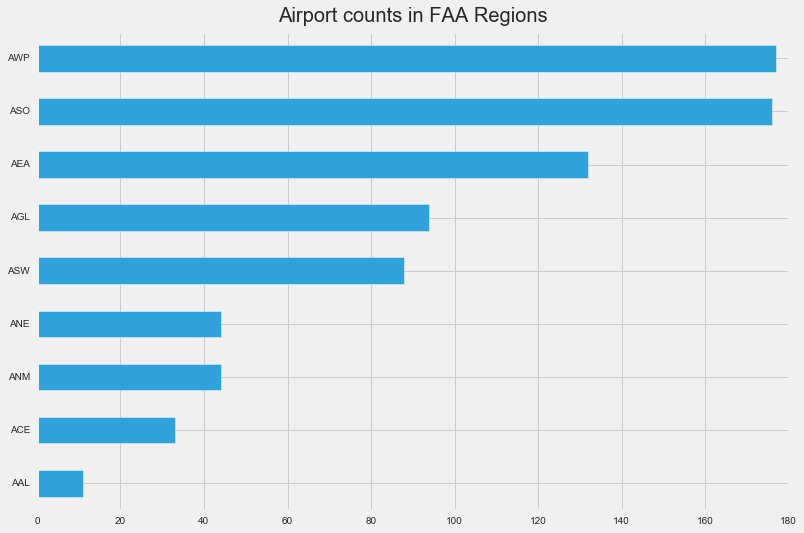

In [143]:
plt = df['FAA REGION'].value_counts().sort_values(ascending =True).plot(kind = 'barh', \
                                                                       figsize = (12,8))
plt.set_title('Airport counts in FAA Regions', y = 1.01)
ax.tick_params(axis = 'both', labelsize = 14)

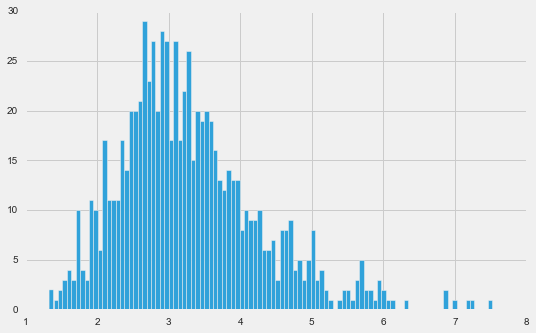

In [161]:
# Distribution of average block delays

df['average block delay'].hist(figsize = (8,5), bins = 100)

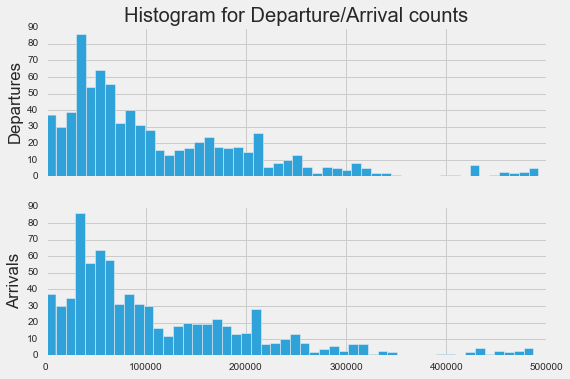

In [160]:
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, sharex=True)
axarr[0].hist(x = 'departures for metric computation', data = df, bins = 50)
axarr[0].set_ylabel("Departures")
axarr[0].set_title('Histogram for Departure/Arrival counts')
axarr[1].hist(x = 'arrivals for metric computation', data = df, bins = 50)
axarr[1].set_ylabel("Arrivals")


### Comments:

It seems that there are 3 types of airports based on the volume of departures and arrivals. This could provide insights into number of clusters later.

In [164]:
df.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,FAA REGION,AP Type
0,ABQ,2004,242.0,235.0,71.0,46.0,53971,53818,0.803,0.7809,...,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87,ASW,Federalized/Commercial


In [174]:
# Encoding FAA REGION to color scatter plot

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
faa_encode = pd.Series(le.fit_transform(df['FAA REGION']), name='FAA_REGION_label')
faa_encode.head()

0    7
1    7
2    7
3    7
4    7
Name: FAA_REGION_label, dtype: int64

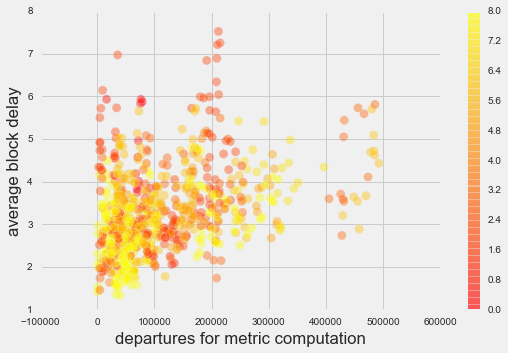

In [175]:
df.plot.scatter(x = 'departures for metric computation', y = 'average block delay', \
               figsize = (8,5), s= 80, alpha = 0.4, c = faa_encode, cmap = 'autumn')

In [47]:
df.head(1)

,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,...,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,FAA REGION,AP Type
0,ABQ,2004.0,242.0,235.0,71.0,46.0,53971,53818,0.803,0.7809,...,10.38,9.89,2.43,12.1,2.46,0.83,2.55,10.87,ASW,Federalized/Commercial


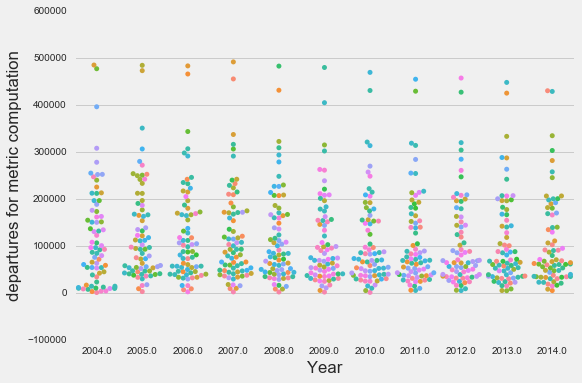

In [48]:
ax = sns.swarmplot(x = 'Year', y = 'departures for metric computation', \
              hue = 'percent on-time gate departures', data = df)
ax.legend_.remove();

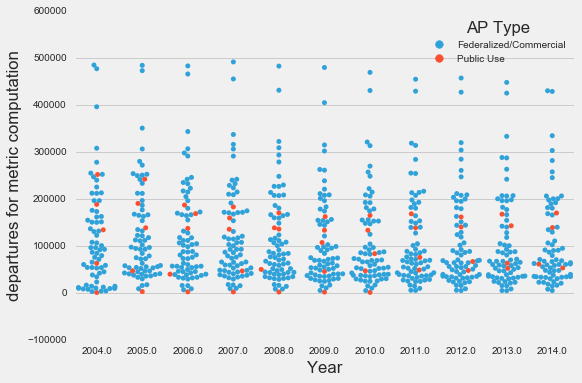

In [49]:
ax = sns.swarmplot(x = 'Year', y = 'departures for metric computation', \
              hue = 'AP Type', data = df)

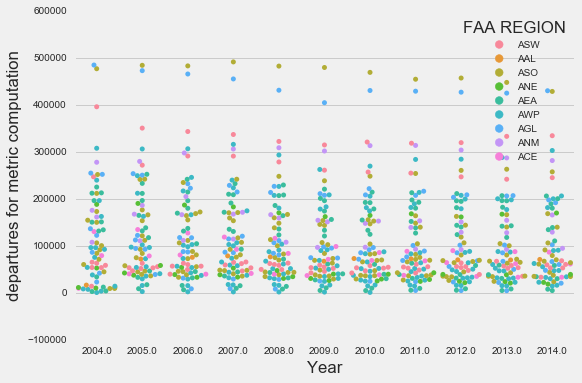

In [50]:
ax = sns.swarmplot(x = 'Year', y = 'departures for metric computation', \
              hue = 'FAA REGION', data = df)

In [51]:
df.dtypes

Airport                                object
Year                                  float64
Departure Cancellations               float64
Arrival Cancellations                 float64
Departure Diversions                  float64
Arrival Diversions                    float64
departures for metric computation       int64
arrivals for metric computation         int64
percent on-time gate departures       float64
percent on-time airport departures    float64
percent on-time gate arrivals         float64
average_gate_departure_delay          float64
average_taxi_out_time                 float64
average taxi out delay                float64
average airport departure delay       float64
average airborne delay                float64
average taxi in delay                 float64
average block delay                   float64
average gate arrival delay            float64
FAA REGION                             object
AP Type                                object
dtype: object

In [52]:
df['Year'] = df['Year'].astype(int)
df['Year'] = df['Year'].astype(str)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [53]:
# Extracting only numeric columns (less year)

unwanted = ['Airport', 'Year', 'FAA REGION', 'COUNTY', 'CITY', 'STATE', 'AP Type']
cols = [x for x in df.columns if x not in unwanted]
df1 = df[cols]
df1.head()

,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,242.0,235.0,71.0,46.0,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,221.0,190.0,61.0,33.0,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,392.0,329.0,71.0,124.0,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,366.0,304.0,107.0,45.0,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,333.0,300.0,79.0,42.0,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


### Part 3: Data Mining

#### 3.1 Scaling continuous features

In [54]:
from sklearn.preprocessing import StandardScaler

df1_standard = pd.DataFrame(StandardScaler().fit_transform(df1), columns=df1.columns)
df1_standard.head()

,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,-0.574713,-0.558841,-0.598447,-0.542560,-0.607163,-0.606139,0.457014,0.709963,0.500021,-0.827217,-1.047069,-0.536544,-0.826210,-0.355457,-0.683889,-0.749327,-0.787421
1,-0.586128,-0.581577,-0.656408,-0.599323,-0.629020,-0.626018,0.667555,0.858688,0.658531,-1.084255,-1.073359,-0.596479,-1.032562,-0.526543,-0.613645,-0.961737,-0.981290
2,-0.493179,-0.511347,-0.598447,-0.201977,-0.650929,-0.632961,0.367055,0.640207,0.153280,-0.675630,-1.047069,-0.652133,-0.773476,-0.646303,-0.672181,-0.638065,-0.495078
3,-0.507312,-0.523979,-0.389788,-0.546926,-0.614469,-0.608259,0.409163,0.571768,-0.042876,-0.527339,-0.928768,-0.549387,-0.631323,-0.586423,-0.145352,-0.233475,-0.221199
4,-0.525249,-0.526000,-0.552079,-0.560025,-0.651878,-0.650238,0.596737,0.756029,0.408878,-0.692107,-0.910365,-0.545106,-0.775769,-0.902931,-0.449742,-0.506573,-0.599706


#### 3.2 Creating dummy variables

In [55]:
df_dum = pd.get_dummies(df.loc[:, ['FAA REGION', 'AP Type']], drop_first=True)

#### 3.3 Concatenating dummy features and scaled continuous features

In [56]:
df_cluster = pd.concat([df['Airport'], df_dum, df1_standard], axis=1)
df_cluster.head()

,Airport,FAA REGION_ACE,FAA REGION_AEA,FAA REGION_AGL,FAA REGION_ANE,FAA REGION_ANM,FAA REGION_ASO,FAA REGION_ASW,FAA REGION_AWP,AP Type_Public Use,...,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.709963,0.500021,-0.827217,-1.047069,-0.536544,-0.826210,-0.355457,-0.683889,-0.749327,-0.787421
1,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.858688,0.658531,-1.084255,-1.073359,-0.596479,-1.032562,-0.526543,-0.613645,-0.961737,-0.981290
2,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.640207,0.153280,-0.675630,-1.047069,-0.652133,-0.773476,-0.646303,-0.672181,-0.638065,-0.495078
3,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.571768,-0.042876,-0.527339,-0.928768,-0.549387,-0.631323,-0.586423,-0.145352,-0.233475,-0.221199
4,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.756029,0.408878,-0.692107,-0.910365,-0.545106,-0.775769,-0.902931,-0.449742,-0.506573,-0.599706


### Part 4: Define the Data

#### 4.1 Confirm that the dataset has a normal distribution. How can you tell? 

In [57]:
from scipy.stats.mstats import normaltest

norm_test = normaltest(df1_standard)
for i in range(len(norm_test.pvalue)):
    if norm_test.pvalue[i] < 0.05:
        print list(df1_standard.columns)[i], ': not normally distributed.'
        print
    else:
        print list(df1_standard.columns)[i], ': is normally distributed.'
        print

Departure Cancellations : not normally distributed.

Arrival Cancellations : not normally distributed.

Departure Diversions : not normally distributed.

Arrival Diversions : not normally distributed.

departures for metric computation : not normally distributed.

arrivals for metric computation : not normally distributed.

percent on-time gate departures : not normally distributed.

percent on-time airport departures : not normally distributed.

percent on-time gate arrivals : not normally distributed.

average_gate_departure_delay : not normally distributed.

average_taxi_out_time : not normally distributed.

average taxi out delay : not normally distributed.

average airport departure delay : not normally distributed.

average airborne delay : not normally distributed.

average taxi in delay : not normally distributed.

average block delay : not normally distributed.

average gate arrival delay : not normally distributed.



#### 4.2 Find correlations in the data

'Correlation coefficients whose magnitude are between 0.9 and 1.0 indicate variables which can be considered very highly correlated. Correlation coefficients whose magnitude are between 0.7 and 0.9 indicate variables which can be considered highly correlated.'

source: https://www.andrews.edu/~calkins/math/edrm611/edrm05.htm

In [58]:
df_corr = abs(df1.corr())

# Showing only correlation coefficients of 0.9 and above

df_corr = df_corr.applymap(lambda x: x if x >= 0.9 else '')
df_corr

,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
Departure Cancellations,1,0.997464,,,,,,,,,,,,,,,
Arrival Cancellations,0.997464,1,,,,,,,,,,,,,,,
Departure Diversions,,,1,,0.934147,0.934035,,,,,,,,,,,
Arrival Diversions,,,,1,,,,,,,,,,,,,
departures for metric computation,,,0.934147,,1,0.999807,,,,,,,,,,,
arrivals for metric computation,,,0.934035,,0.999807,1,,,,,,,,,,,
percent on-time gate departures,,,,,,,1,,,0.913107,,,,,,,
percent on-time airport departures,,,,,,,,1,,,,,0.954832,,,,
percent on-time gate arrivals,,,,,,,,,1,,,,,,,,0.922723
average_gate_departure_delay,,,,,,,0.913107,,,1,,,,,,,


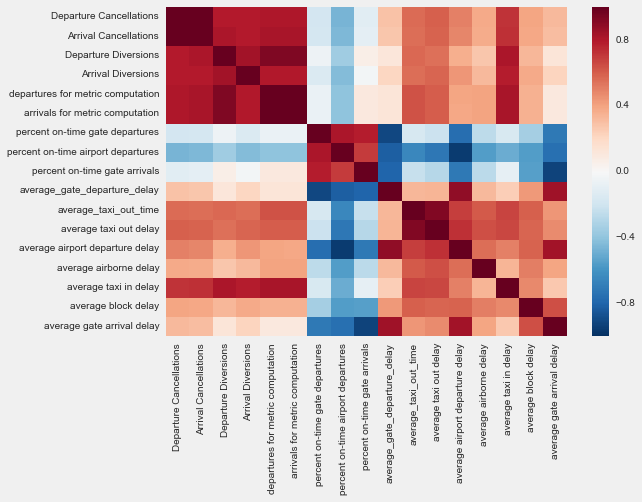

In [59]:
plt.Figure(figsize = (15,8))
ax = sns.heatmap(df1.corr())

#### Comments:

When we observe the first 6 features from left ("Departure Cancellations" to "arrivals for metric computation"), we notice that the correlation is very similar across with all other variables. The color tonation is almost the same across horizontally.

#### 4.3 What is the value of understanding correlations before PCA? 

Answer: 

Including many highly correlated feature may over emphasize a particular principal component by increasing the eigenvalue (weightage of that component). Some people [argue]('http://stats.stackexchange.com/questions/50537/should-one-remove-highly-correlated-variables-before-doing-pca') to drop such highly correlated columns.

We will attempt both keeping and dropping correlated features for PCA later to observe the differences.

### Part 5: Perform a PCA

#### 5.1 Conduct the PCA

## PCA with dropped correlated columns

In [180]:
# Dropping the highly correlated columns from the correlation plot earlier.

drop_list = ['Airport', \
             'Arrival Cancellations', \
             'Departure Diversions', \
             'Arrival Diversions', \
             'Departures for metric computation', \
             'Arrivals for metric computation']

df_cluster = df_cluster[[x for x in df_cluster.columns if x not in drop_list]]
df_cluster.head()

,FAA REGION_ACE,FAA REGION_AEA,FAA REGION_AGL,FAA REGION_ANE,FAA REGION_ANM,FAA REGION_ASO,FAA REGION_ASW,FAA REGION_AWP,AP Type_Public Use,Departure Cancellations,...,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Latitude,Longitude
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.574713,...,-0.827217,-1.047069,-0.536544,-0.826210,-0.355457,-0.683889,-0.749327,-0.787421,0.388463,0.558235
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.586128,...,-1.084255,-1.073359,-0.596479,-1.032562,-0.526543,-0.613645,-0.961737,-0.981290,0.388463,0.558235
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.493179,...,-0.675630,-1.047069,-0.652133,-0.773476,-0.646303,-0.672181,-0.638065,-0.495078,0.388463,0.558235
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.507312,...,-0.527339,-0.928768,-0.549387,-0.631323,-0.586423,-0.145352,-0.233475,-0.221199,0.388463,0.558235
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.525249,...,-0.692107,-0.910365,-0.545106,-0.775769,-0.902931,-0.449742,-0.506573,-0.599706,0.388463,0.558235


In [181]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pc = pca.fit_transform(df_cluster)

#### Composition of Principal Components

In [190]:
# Observing compositions of each feature in principal components

components = abs(pd.DataFrame(pca.components_, columns = df_cluster.columns, index = ['pc1', 'pc2']))
components.T.sort_values('pc1', ascending = False)

,pc1,pc2
average airport departure delay,0.338406,0.140731
percent on-time airport departures,0.330543,0.134820
average taxi out delay,0.296637,0.163803
average_taxi_out_time,0.288458,0.188054
average gate arrival delay,0.278907,0.285400
average_gate_departure_delay,0.268258,0.307411
average block delay,0.259237,0.020749
average taxi in delay,0.250593,0.291711
Departure Cancellations,0.245221,0.265484
average airborne delay,0.233491,0.062229


In [68]:
pca.explained_variance_ratio_

array([ 0.51695253,  0.22647156])

,pc1,pc2
0,-2.501617,0.069749
1,-2.942496,-0.226602
2,-2.306556,0.422039
3,-1.759234,0.429609
4,-2.399866,0.121921


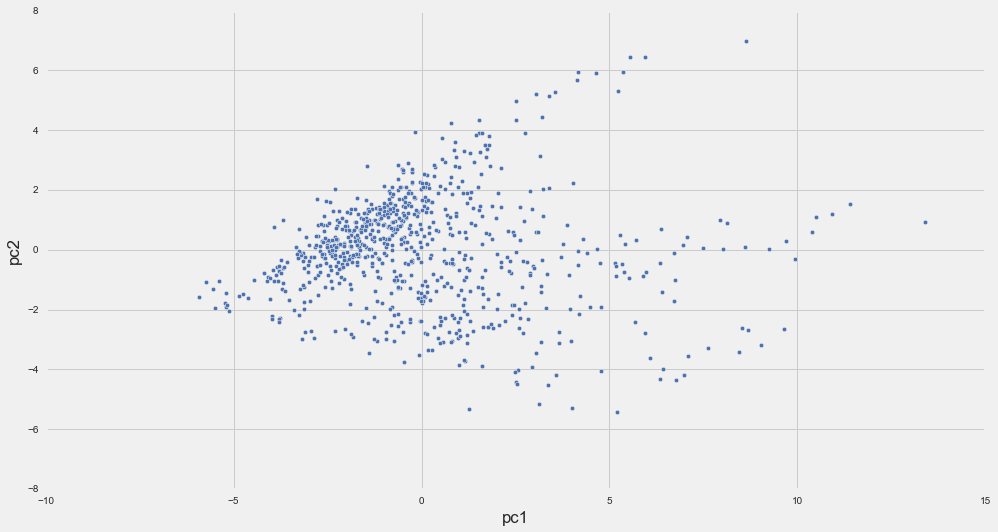

In [69]:
pcdf = pd.DataFrame(pc, columns=['pc1', 'pc2'])
pcdf.plot.scatter('pc1','pc2', figsize = (15,8))
pcdf.head()

## Clustering using Kmeans

In [73]:
# Searching for best k

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

rand_state = 44


k_list = [2, 3, 4,5,6,7,8]

for k in k_list:
    kmean = KMeans(n_clusters=k, random_state=rand_state)
    kmean.fit(pcdf)
    
    print k, silhouette_score(pcdf, kmean.labels_), kmean.inertia_
    print

2 0.492577987589 5059.28726769

3 0.359043485368 3665.10895344

4 0.405542430891 2579.31577342

5 0.384198924603 2034.74157386

6 0.378262281622 1751.1675503

7 0.359780915242 1501.97208048

8 0.366817982299 1311.14173828



Although having 2 clusters resulted in the highest silhouette score, from the EDA, on features such as geographical locations and traffic volumne, I suspect there might be more than 2 clusters. Therefore, the next highest silhouette score with 4 clusters was chosen.

In [74]:
# Getting values for principal components with 4 clusters

chosen_k = 4

kmean = KMeans(n_clusters=chosen_k, random_state=rand_state)
kmean.fit(pcdf)
    
label = pd.Series(kmean.labels_, name = 'label')

kmean_df = pd.concat([pcdf,label], axis = 1)
kmean_df.head()

,pc1,pc2,label
0,-2.501617,0.069749,1
1,-2.942496,-0.226602,1
2,-2.306556,0.422039,1
3,-1.759234,0.429609,1
4,-2.399866,0.121921,1


In [75]:
# Extracting the centorid positions of clusters

centroid = pd.DataFrame(kmean.cluster_centers_, columns=['pc1', 'pc2'])
centroid.head()

,pc1,pc2
0,1.218994,-1.977013
1,-2.088898,-0.091463
2,6.765153,-0.967820
3,0.732854,1.984525


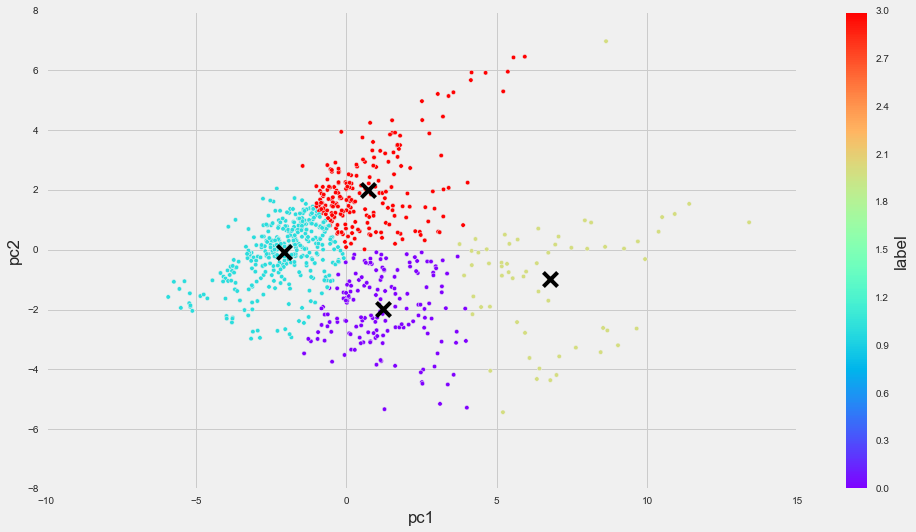

In [76]:
# Plotting the different clusters

plt.figure(figsize = (15,8))
ax = kmean_df.plot.scatter('pc1', 'pc2', c = 'label', figsize = (15,8), cmap = 'rainbow')
plt.scatter(centroid['pc1'], centroid['pc2'], s = 200, c= 'k', marker='x', linewidths=4);

### Comparing the new clusters with original FAA REGIONS

In [77]:
from sklearn.preprocessing import LabelEncoder

y = df['FAA REGION']

le = LabelEncoder()
le.fit(y)
y_encode = le.transform(y)

In [78]:
from scipy.stats import mode

clusters = kmean.fit_predict(pc)

labels = np.zeros_like(clusters)
for i in range(chosen_k):
    mask = (clusters == i)
    labels[mask] = mode(y_encode[mask])[0]

In [79]:
y_pred = le.inverse_transform(labels)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, y_pred)

0.33667083854818525

#### Comments:

Such low accuracy scores hinted towards clustering beyond the FAA REGIONs.

[[  0   0   0   0   0   0   6   0   5]
 [  0   0   0   0   0   0   9   0  24]
 [  0   0  39   0   0   0  48   0  45]
 [  0   0  10   0   0   0  28   0  56]
 [  0   0   1   0   0   0  15   0  28]
 [  0   0   0   0   0   0   0   0  44]
 [  0   0   8   0   0   0  67   0 101]
 [  0   0   1   0   0   0  24   0  63]
 [  0   0   2   0   0   0  12   0 163]]


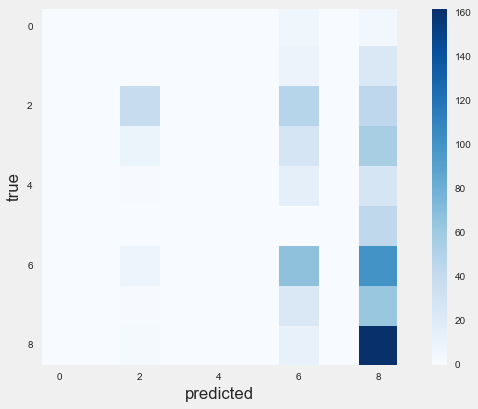

In [80]:
# Plotting confusion matrix

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,6))
print(confusion_matrix(y_encode, labels))
plt.imshow(confusion_matrix(y_encode, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## Clustering using DBSCAN

In [82]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps =0.15, min_samples=3)

db.fit(pc)

DBSCAN(algorithm='auto', eps=0.15, leaf_size=30, metric='euclidean',
    min_samples=3, n_jobs=1, p=None)

In [83]:
core_samples = db.core_sample_indices_
labels = db.labels_

In [84]:
print("Silhouette Coefficient: %0.3f"
      % silhouette_score(pc, labels))

Silhouette Coefficient: -0.353


//anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1145: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


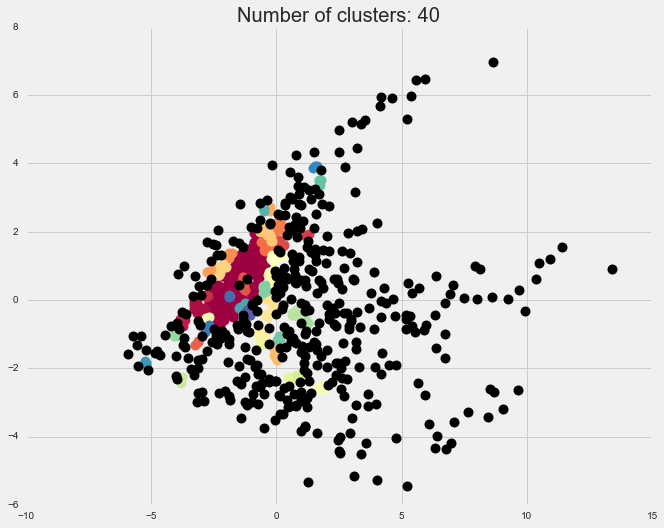

In [85]:
def plot_dbscan(db, X):
    fig = plt.figure(figsize=(10,8))
    
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=10)
        
        
    #plt.gca().set_xlim(-2.5,2.5)
    #plt.gca().set_ylim(-2.5,2.5)
    plt.title('Number of clusters: %d' % n_clusters_);
    
plot_dbscan(db, pc)

In [86]:
clusters = db.fit_predict(pc)

labels = np.zeros_like(clusters)
for i in range(chosen_k):
    mask = (clusters == i)
    labels[mask] = mode(y_encode[mask])[0]

In [87]:
y_pred = le.inverse_transform(labels)

from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y, y_pred)

0.091364205256570713

[[  9   0   0   0   0   0   2   0   0]
 [ 14   0   0   0   0   0  18   0   1]
 [121   0   0   0   0   0  10   0   1]
 [ 76   0   0   0   0   0  18   0   0]
 [ 27   0   0   0   0   0  17   0   0]
 [ 41   0   0   0   0   0   3   0   0]
 [126   0   0   0   0   0  50   0   0]
 [ 38   0   0   0   0   0  45   0   5]
 [120   0   0   0   0   0  43   0  14]]


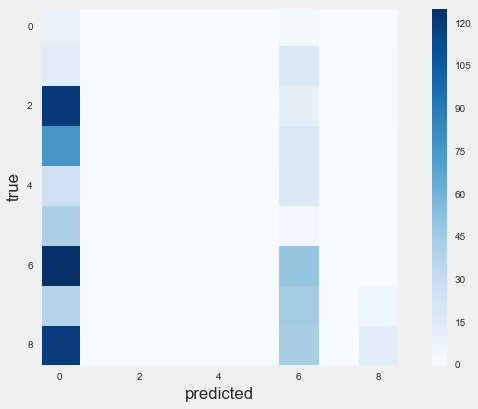

In [88]:
# Plotting confusion matrix

import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,6))
print(confusion_matrix(y_encode, labels))
plt.imshow(confusion_matrix(y_encode, labels),
           cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('true')
plt.xlabel('predicted');

## PCA with all continuous features included (disregarding underlying multi-collinearity issues)

In [89]:
df_cluster = pd.concat([df['Airport'], df_dum, df1_standard], axis=1)
df_cluster.head()

,Airport,FAA REGION_ACE,FAA REGION_AEA,FAA REGION_AGL,FAA REGION_ANE,FAA REGION_ANM,FAA REGION_ASO,FAA REGION_ASW,FAA REGION_AWP,AP Type_Public Use,...,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.709963,0.500021,-0.827217,-1.047069,-0.536544,-0.826210,-0.355457,-0.683889,-0.749327,-0.787421
1,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.858688,0.658531,-1.084255,-1.073359,-0.596479,-1.032562,-0.526543,-0.613645,-0.961737,-0.981290
2,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.640207,0.153280,-0.675630,-1.047069,-0.652133,-0.773476,-0.646303,-0.672181,-0.638065,-0.495078
3,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.571768,-0.042876,-0.527339,-0.928768,-0.549387,-0.631323,-0.586423,-0.145352,-0.233475,-0.221199
4,ABQ,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.756029,0.408878,-0.692107,-0.910365,-0.545106,-0.775769,-0.902931,-0.449742,-0.506573,-0.599706


In [90]:
del df_cluster['Airport']

In [91]:
pca_all = PCA(n_components=2)
pc_all = pca_all.fit_transform(df_cluster)

In [92]:
pca_all.components_

array([[-0.00685049,  0.03985963,  0.01170404, -0.00232096, -0.00197698,
         0.00251236, -0.00127957, -0.04047116, -0.00442272,  0.26861729,
         0.26691256,  0.24744124,  0.25321885,  0.25739699,  0.25710483,
        -0.16483811, -0.27287457, -0.14852643,  0.20147261,  0.26910288,
         0.27503013,  0.27985694,  0.20173601,  0.26596487,  0.22113493,
         0.21084422],
       [ 0.00267997,  0.06573039, -0.01056501,  0.01314035, -0.02769323,
         0.01051979, -0.01182155, -0.04618833, -0.01389533, -0.17749387,
        -0.18873001, -0.27181609, -0.20644551, -0.27320632, -0.27381876,
        -0.34662454, -0.22670289, -0.39758125,  0.33833413, -0.04093285,
        -0.02059885,  0.23304662,  0.05438269, -0.17872297,  0.11653774,
         0.33139775]])

In [93]:
pca_all.explained_variance_ratio_

array([ 0.51412974,  0.23421613])

In [94]:
pc_all

array([[-2.65688832, -0.37868545],
       [-3.04107968, -0.74679972],
       [-2.42467567, -0.11038145],
       ..., 
       [-3.80372594, -1.20838032],
       [-2.87333823,  0.11038638],
       [-2.22477102,  0.99220124]])

In [95]:
# Searching for best k

k_list = [2, 3, 4,5,6,7,8]

for k in k_list:
    kmean_all = KMeans(n_clusters=k, random_state=rand_state)
    kmean_all.fit(pc_all)
    
    print k, silhouette_score(pc_all, kmean_all.labels_), kmean_all.inertia_
    print

2 0.517437281766 5905.86885107

3 0.349487672244 4334.50804108

4 0.391570445832 3211.91438996

5 0.400981935929 2575.23368784

6 0.387838038059 2089.49511317

7 0.397619480403 1787.39285827

8 0.369296499375 1543.77888214



In [96]:
# Plot using 5 clusters

chosen_k = 5

kmean = KMeans(n_clusters=chosen_k, random_state=rand_state)
kmean.fit(pc_all)
    
label = pd.Series(kmean.labels_, name = 'label')
pc_all_df = pd.DataFrame(pc_all, columns=['pc1','pc2'])
kmean_df = pd.concat([pc_all_df,label], axis = 1)
kmean_df.head()

,pc1,pc2,label
0,-2.656888,-0.378685,0
1,-3.041080,-0.746800,0
2,-2.424676,-0.110381,0
3,-1.981790,0.094544,0
4,-2.551838,-0.330081,0


In [97]:
centroid = pd.DataFrame(kmean.cluster_centers_, columns=['pc1', 'pc2'])

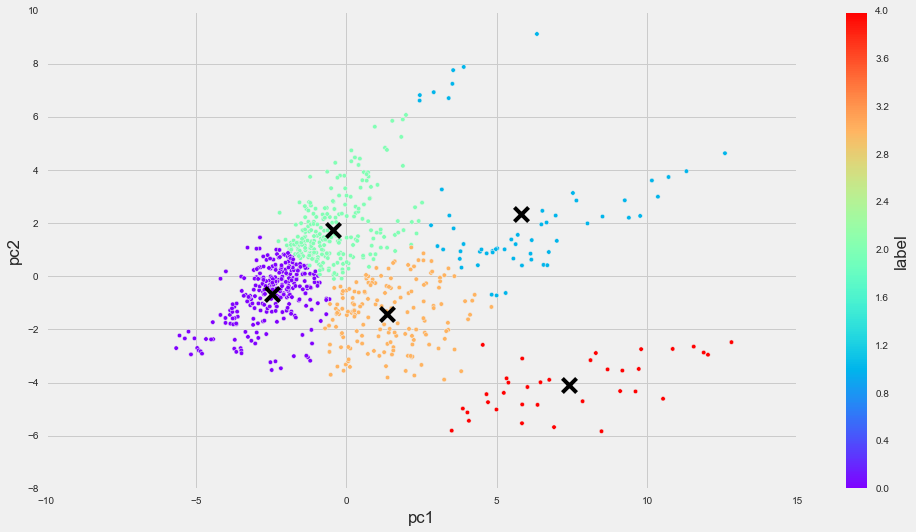

In [98]:
plt.figure(figsize = (15,8))
ax = kmean_df.plot.scatter('pc1', 'pc2', c = 'label', figsize = (15,8), cmap = 'rainbow')
plt.scatter(centroid['pc1'], centroid['pc2'], s = 200, c= 'k', marker='x', linewidths=4);

## Throwing in Latitude and Longitude into the mix

In [101]:
df_cluster.shape

(799, 26)

In [102]:
df_original[['Latitude', 'Longitude']].shape

(799, 2)

In [106]:
from sklearn.preprocessing import MinMaxScaler

df_lat_lon_standard = pd.DataFrame(MinMaxScaler().fit_transform(df_original[['Latitude', 'Longitude']]), \
                                   columns = ['Latitude', 'Longitude'])

In [107]:
df_cluster = pd.concat([df_cluster, df_lat_lon_standard], axis = 1)
df_cluster.head()

,FAA REGION_ACE,FAA REGION_AEA,FAA REGION_AGL,FAA REGION_ANE,FAA REGION_ANM,FAA REGION_ASO,FAA REGION_ASW,FAA REGION_AWP,AP Type_Public Use,Departure Cancellations,...,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,Latitude,Longitude
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.574713,...,-0.827217,-1.047069,-0.536544,-0.826210,-0.355457,-0.683889,-0.749327,-0.787421,0.388463,0.558235
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.586128,...,-1.084255,-1.073359,-0.596479,-1.032562,-0.526543,-0.613645,-0.961737,-0.981290,0.388463,0.558235
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.493179,...,-0.675630,-1.047069,-0.652133,-0.773476,-0.646303,-0.672181,-0.638065,-0.495078,0.388463,0.558235
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.507312,...,-0.527339,-0.928768,-0.549387,-0.631323,-0.586423,-0.145352,-0.233475,-0.221199,0.388463,0.558235
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.525249,...,-0.692107,-0.910365,-0.545106,-0.775769,-0.902931,-0.449742,-0.506573,-0.599706,0.388463,0.558235


### Conducting PCA once again with lat lon

In [108]:
pca = PCA(n_components=2)
pca_lat_lon = pca.fit_transform(df_cluster)

In [109]:
pca_lat_lon

array([[-2.65987545, -0.37804873],
       [-3.04425657, -0.7449469 ],
       [-2.42753475, -0.11061242],
       ..., 
       [-3.80910823, -1.20756988],
       [-2.8778244 ,  0.10795555],
       [-2.22868167,  0.98750047]])

In [110]:
pca.components_

array([[-0.00683592,  0.03995911,  0.01173216, -0.00226354, -0.00201268,
         0.0025744 , -0.00130585, -0.04065856, -0.00440417,  0.26833969,
         0.26662256,  0.24706955,  0.25289076,  0.25702817,  0.25673545,
        -0.16509749, -0.27299458, -0.14883563,  0.20173608,  0.26901139,
         0.27492205,  0.27999559,  0.20173978,  0.26565487,  0.22103736,
         0.21107365,  0.00980744,  0.02654604],
       [ 0.00271961,  0.06575345, -0.01044947,  0.01327457, -0.02770712,
         0.01071731, -0.01184651, -0.04659221, -0.01377146, -0.17790899,
        -0.18913941, -0.27212812, -0.20688341, -0.27351691, -0.27412843,
        -0.34592377, -0.22594613, -0.39683817,  0.33764872, -0.04128271,
        -0.02109449,  0.23231883,  0.05397003, -0.17922066,  0.11552771,
         0.33060932,  0.01046825,  0.04059166]])

In [111]:
pca.explained_variance_ratio_

array([ 0.51239601,  0.23364791])

,pc1,pc2
0,-2.659875,-0.378049
1,-3.044257,-0.744947
2,-2.427535,-0.110612
3,-1.984674,0.093014
4,-2.554865,-0.329849


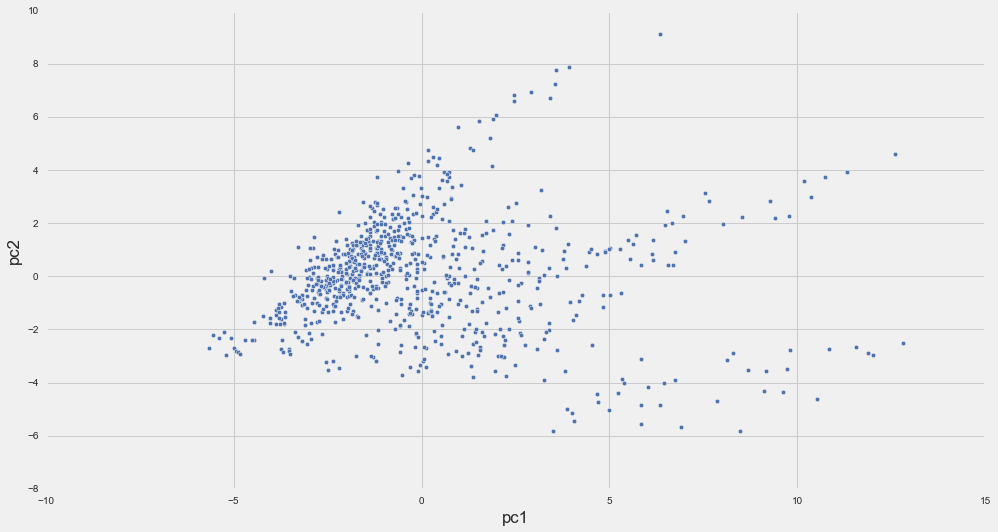

In [112]:
pcdf_lat_lon = pd.DataFrame(pca_lat_lon, columns=['pc1', 'pc2'])
pcdf_lat_lon.plot.scatter('pc1','pc2', figsize = (15,8))
pcdf_lat_lon.head()

### Searching for best k

In [113]:
# Searching for best k

k_list = [2, 3, 4,5,6,7,8]

for k in k_list:
    kmean_all = KMeans(n_clusters=k, random_state=rand_state)
    kmean_all.fit(pcdf_lat_lon)
    
    print k, silhouette_score(pcdf_lat_lon, kmean_all.labels_), kmean_all.inertia_
    print

2 0.517090729212 5916.33773943

3 0.346707239504 4341.26382294

4 0.391343798961 3217.60929824

5 0.401105613472 2578.67698971

6 0.387755169414 2092.37439566

7 0.399331590525 1791.45153997

8 0.369639290174 1545.65110504



In [114]:
# Plot using 5 clusters

chosen_k = 5

kmean = KMeans(n_clusters=chosen_k, random_state=rand_state)
kmean.fit(pcdf_lat_lon)
    
label = pd.Series(kmean.labels_, name = 'label')

kmean_df = pd.concat([pcdf_lat_lon, label], axis = 1)
kmean_df.head()

,pc1,pc2,label
0,-2.659875,-0.378049,0
1,-3.044257,-0.744947,0
2,-2.427535,-0.110612,0
3,-1.984674,0.093014,0
4,-2.554865,-0.329849,0


In [115]:
centroid = pd.DataFrame(kmean.cluster_centers_, columns=['pc1', 'pc2'])

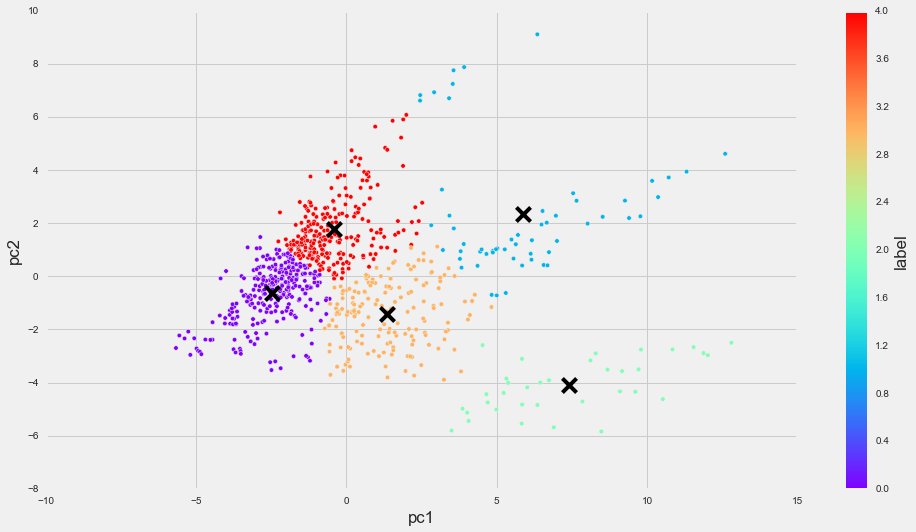

In [116]:
plt.figure(figsize = (15,8))
ax = kmean_df.plot.scatter('pc1', 'pc2', c = 'label', figsize = (15,8), cmap = 'rainbow')
plt.scatter(centroid['pc1'], centroid['pc2'], s = 200, c= 'k', marker='x', linewidths=4);

## Comparing characteristics of different clusters (via Tableau)

In [119]:
df_clustered = pd.concat([ap_cancel[unwanted], df1, kmean_df['label'], df_original[['Latitude', 'Longitude']]], axis=1)
df_clustered.head()

,Airport,Year,FAA REGION,COUNTY,CITY,STATE,AP Type,Departure Cancellations,Arrival Cancellations,Departure Diversions,...,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay,label,Latitude,Longitude
0,ABQ,2004.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,242.0,235.0,71.0,...,9.89,2.43,12.10,2.46,0.83,2.55,10.87,0,35.0402,-106.609
1,ABQ,2005.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,221.0,190.0,61.0,...,9.79,2.29,11.20,2.26,0.89,2.34,10.24,0,35.0402,-106.609
2,ABQ,2006.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,392.0,329.0,71.0,...,9.89,2.16,12.33,2.12,0.84,2.66,11.82,0,35.0402,-106.609
3,ABQ,2007.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,366.0,304.0,107.0,...,10.34,2.40,12.95,2.19,1.29,3.06,12.71,0,35.0402,-106.609
4,ABQ,2008.0,ASW,BERNALILLO,ALBUQUERQUE,NM,Federalized/Commercial,333.0,300.0,79.0,...,10.41,2.41,12.32,1.82,1.03,2.79,11.48,0,35.0402,-106.609


In [120]:
# Output to csv for visualizations in Tableau

df_clustered.to_csv('airport_clustered.csv')

### Part 7: Write an analysis plan of your findings 

Create a writeup on the interpretation of findings including an executive summary with conclusions and next steps. Put it on your blog, and include the link here.

Which operational features are most correlated with delays?

What should the airport's next steps be?

### Bonus: Create a 3-Dimensional Plot of your new dataset with PCA applied

## Reconstruct with 3 principal components

In [121]:
# Creating 3 Principal Components first

pca3 = PCA(n_components=3)
pc3 = pca3.fit_transform(df_cluster)


In [122]:
print pca3.explained_variance_
print
print pca3.explained_variance_ratio_

pca3.components_

[ 9.20375488  4.1968283   1.23605155]

[ 0.51239601  0.23364791  0.06881408]


array([[ -6.83591995e-03,   3.99591077e-02,   1.17321558e-02,
         -2.26354417e-03,  -2.01267995e-03,   2.57439743e-03,
         -1.30584887e-03,  -4.06585611e-02,  -4.40417171e-03,
          2.68339691e-01,   2.66622555e-01,   2.47069546e-01,
          2.52890756e-01,   2.57028169e-01,   2.56735452e-01,
         -1.65097485e-01,  -2.72994583e-01,  -1.48835633e-01,
          2.01736079e-01,   2.69011392e-01,   2.74922048e-01,
          2.79995586e-01,   2.01739777e-01,   2.65654873e-01,
          2.21037360e-01,   2.11073649e-01,   9.80743720e-03,
          2.65460366e-02],
       [  2.71960753e-03,   6.57534489e-02,  -1.04494699e-02,
          1.32745705e-02,  -2.77071209e-02,   1.07173052e-02,
         -1.18465144e-02,  -4.65922094e-02,  -1.37714558e-02,
         -1.77908985e-01,  -1.89139406e-01,  -2.72128125e-01,
         -2.06883413e-01,  -2.73516913e-01,  -2.74128429e-01,
         -3.45923769e-01,  -2.25946134e-01,  -3.96838173e-01,
          3.37648716e-01,  -4.12827111e-02,

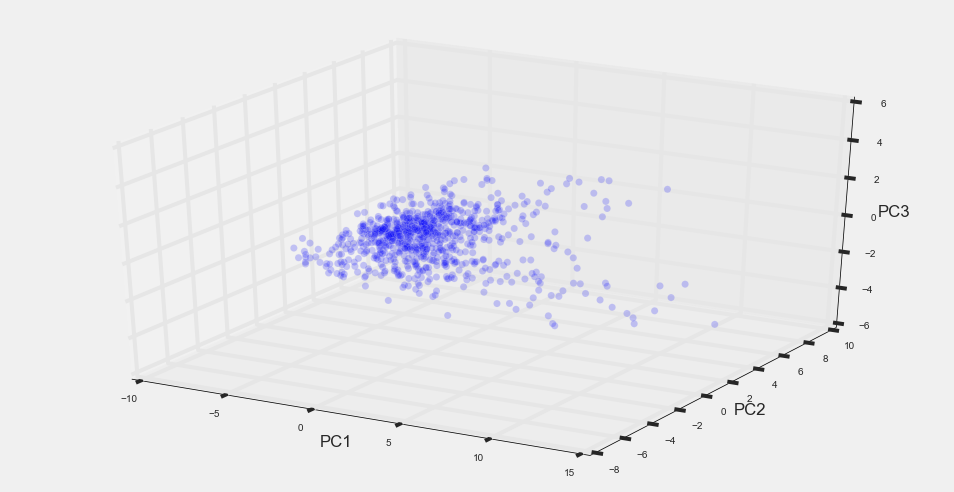

In [123]:
pc3df = pd.DataFrame(pc3, columns=['pc1', 'pc2', 'pc3'])

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs = pc3df['pc1'] , ys = pc3df['pc2'], zs=pc3df['pc3'], alpha = 0.2, s = 50)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()

## Clustering with 3 components

In [124]:
rand_state = 44

k_list = [2, 3, 4,5,6,7,8]

for k in k_list:
    kmean = KMeans(n_clusters=k, random_state=rand_state)
    kmean.fit(pc3df)
    
    print k, silhouette_score(pc3df, kmean.labels_), kmean.inertia_
    print

2 0.490410059546 6901.02758339

3 0.310372671048 5284.30199616

4 0.349257501063 4133.41294588

5 0.371313031674 3129.50612811

6 0.344896213281 2588.27449883

7 0.348660893279 2285.27834769

8 0.315900114781 2059.11224185



Although we see that having 2 clusters result in highest silhouette scores, we will try the same 4 clusters as with the 2D.

In [125]:
pc3df.head()

,pc1,pc2,pc3
0,-2.659875,-0.378049,0.089464
1,-3.044257,-0.744947,0.079896
2,-2.427535,-0.110612,0.439514
3,-1.984674,0.093014,0.266147
4,-2.554865,-0.329849,0.266472


In [126]:
kmean = KMeans(n_clusters=4, random_state=rand_state)
kmean.fit(pc3df)

label = pd.Series(kmean.labels_, name = 'label')

kmean_df = pd.concat([pc3df,label], axis = 1)

kmean_df.head()

,pc1,pc2,pc3,label
0,-2.659875,-0.378049,0.089464,0
1,-3.044257,-0.744947,0.079896,0
2,-2.427535,-0.110612,0.439514,0
3,-1.984674,0.093014,0.266147,0
4,-2.554865,-0.329849,0.266472,0


In [127]:
centroid = pd.DataFrame(kmean.cluster_centers_, columns=['pc1', 'pc2', 'pc3'])
centroid.head()

,pc1,pc2,pc3
0,-2.254634,-0.407970,-0.062907
1,1.560127,-1.521421,-0.339608
2,7.397094,-0.651008,-0.247882
3,0.083289,2.276485,0.493397


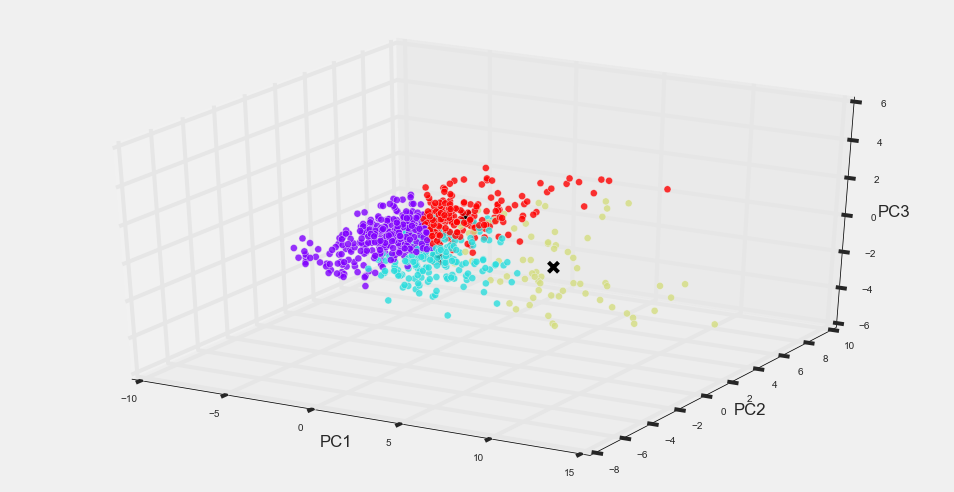

In [128]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(xs = centroid['pc1'] , ys = centroid['pc2'], zs = centroid['pc3'], \
           s = 100, c = 'black', marker = 'x', linewidth = 4, alpha = 1.0)
ax.scatter(xs = kmean_df['pc1'] , ys = kmean_df['pc2'], zs=kmean_df['pc3'], alpha = 0.8, \
           s = 50, c = kmean_df['label'], cmap = 'rainbow')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

plt.show()